In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Carregando os arquivos CSV
dCliente = pd.read_csv('/content/drive/MyDrive/Teste BI/dCliente.csv')
dProduto = pd.read_csv('/content/drive/MyDrive/Teste BI/dProduto.csv')
fVendas = pd.read_csv('/content/drive/MyDrive/Teste BI/fVendas.csv')

# Carregando o arquivo XLSX
fMetas = pd.read_excel('/content/drive/MyDrive/Teste BI/fMetas.xlsx')

In [33]:
# Verificando valores faltantes
print("Valores faltantes em dCliente:")
print(dCliente.isnull().sum())
print("\nValores faltantes em dProduto:")
print(dProduto.isnull().sum())
print("\nValores faltantes em fVendas:")
print(fVendas.isnull().sum())
print("\nValores faltantes em fMetas:")
print(fMetas.isnull().sum())

# Decidindo como lidar com os valores faltantes (preenchimento ou exclusão)

# Optei pela exclusão dos

# Excluindo linhas com valores faltantes
dProduto.dropna(subset=['ProductDetail'], inplace=True)


Valores faltantes em dCliente:
CustomerKey     0
BusinessType    0
StateCode       0
StateName       0
CityName        0
Continent       0
CountryName     0
Customer        0
dtype: int64

Valores faltantes em dProduto:
CategoryName       0
ProductDetail      0
ProductKey         0
ProductName        0
ProductSize        0
SubcategoryName    0
UnitPrice          0
dtype: int64

Valores faltantes em fVendas:
CustomerKey         0
DueDate             0
OrderDate           0
ShipDate            0
ProductKey          0
SalesOrderNumber    0
OrderQuantity       0
dtype: int64

Valores faltantes em fMetas:
CountryName    0
Ano            0
Meta           0
dtype: int64


In [ ]:
# Lidando com os valores faltantes

# Excluindo linhas com valores faltantes
dProduto.dropna(subset=['ProductDetail'], inplace=True)

print("\nValores faltantes em dProduto:")
print(dProduto.isnull().sum())


Valores faltantes em dProduto:
CategoryName       0
ProductDetail      0
ProductKey         0
ProductName        0
ProductSize        0
SubcategoryName    0
UnitPrice          0
dtype: int64


In [ ]:
# Verificando valores duplicados
print("Valores duplicados em dCliente:", dCliente.duplicated().sum())
print("Valores duplicados em dProduto:", dProduto.duplicated().sum())
print("Valores duplicados em fVendas:", fVendas.duplicated().sum())
print("Valores duplicados em fMetas:", fMetas.duplicated().sum())

# Removendo valores duplicados, se houver
dCliente.drop_duplicates(inplace=True)
dProduto.drop_duplicates(inplace=True)
fVendas.drop_duplicates(inplace=True)
fMetas.drop_duplicates(inplace=True)


Valores duplicados em dCliente: 0
Valores duplicados em dProduto: 0
Valores duplicados em fVendas: 0
Valores duplicados em fMetas: 0


In [ ]:
# Convertendo colunas de data (modifique 'date_column' pelo nome da coluna de data apropriada)
fVendas['OrderDate'] = pd.to_datetime(fVendas['OrderDate'])
fVendas['DueDate'] = pd.to_datetime(fVendas['DueDate'])
fVendas['ShipDate'] = pd.to_datetime(fVendas['ShipDate'])

# Verificar se a conversão foi bem-sucedida
print(fVendas.dtypes)


CustomerKey                  int64
DueDate             datetime64[ns]
OrderDate           datetime64[ns]
ShipDate            datetime64[ns]
ProductKey                   int64
SalesOrderNumber            object
OrderQuantity                int64
dtype: object


In [ ]:
# Junção das tabelas dCliente e fVendas usando a chave 'CustomerKey'
clientes_vendas = pd.merge(dCliente, fVendas, on='CustomerKey', how='inner')

# Junção das tabelas dProduto e fVendas usando a chave 'ProductKey'
produtos_vendas = pd.merge(dProduto, fVendas, on='ProductKey', how='inner')

# Junção das tabelas resultantes das duas junções anteriores
dados_completos = pd.merge(clientes_vendas, produtos_vendas, on=['CustomerKey', 'OrderQuantity', 'DueDate', 'OrderDate', 'SalesOrderNumber', 'ShipDate', 'ProductKey'], how='inner')

In [ ]:
print("Colunas em dados_completos:")
print(dados_completos.columns)

print("\nColunas em fMetas:")
print(fMetas.columns)


Colunas em dados_completos:
Index(['CustomerKey', 'BusinessType', 'StateCode', 'StateName', 'CityName',
       'Continent', 'CountryName', 'Customer', 'DueDate', 'OrderDate',
       'ShipDate', 'ProductKey', 'SalesOrderNumber', 'OrderQuantity',
       'CategoryName', 'ProductDetail', 'ProductName', 'ProductSize',
       'SubcategoryName', 'UnitPrice'],
      dtype='object')

Colunas em fMetas:
Index(['Pais', 'Ano', 'Meta'], dtype='object')


In [ ]:
# Criando a coluna 'Ano' a partir da coluna 'OrderDate'
dados_completos['Ano'] = dados_completos['OrderDate'].dt.year

# Verifique se a coluna 'Ano' foi criada corretamente
print("Colunas em dados_completos após criar a coluna 'Ano':")
print(dados_completos.columns)

# Faça uma junção com a tabela fMetas
dados_completos_metas = pd.merge(dados_completos, fMetas, on=['CountryName', 'Ano'], how='left')

Colunas em dados_completos após criar a coluna 'Ano':
Index(['CustomerKey', 'BusinessType', 'StateCode', 'StateName', 'CityName',
       'Continent', 'CountryName', 'Customer', 'DueDate', 'OrderDate',
       'ShipDate', 'ProductKey', 'SalesOrderNumber', 'OrderQuantity',
       'CategoryName', 'ProductDetail', 'ProductName', 'ProductSize',
       'SubcategoryName', 'UnitPrice', 'Ano'],
      dtype='object')


# Estatística Descritiva

In [ ]:
# Verificando informações gerais sobre o DataFrame
print(dados_completos_metas.info())

# Verificando as estatísticas descritivas das colunas numéricas
print(dados_completos_metas.describe())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49846 entries, 0 to 49845
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerKey       49846 non-null  int64         
 1   BusinessType      49846 non-null  object        
 2   StateCode         49846 non-null  object        
 3   StateName         49846 non-null  object        
 4   CityName          49846 non-null  object        
 5   Continent         49846 non-null  object        
 6   CountryName       49846 non-null  object        
 7   Customer          49846 non-null  object        
 8   DueDate           49846 non-null  datetime64[ns]
 9   OrderDate         49846 non-null  datetime64[ns]
 10  ShipDate          49846 non-null  datetime64[ns]
 11  ProductKey        49846 non-null  int64         
 12  SalesOrderNumber  49846 non-null  object        
 13  OrderQuantity     49846 non-null  int64         
 14  CategoryName      4984

# Análise de correlação

In [ ]:
# Verificando a correlação entre as variáveis numéricas
correlacao = dados_completos_metas.corr()
print(correlacao)


               CustomerKey  ProductKey  OrderQuantity       Ano      Meta
CustomerKey       1.000000    0.022507      -0.015886  0.013681 -0.021981
ProductKey        0.022507    1.000000      -0.002202  0.583130  0.054615
OrderQuantity    -0.015886   -0.002202       1.000000  0.073619 -0.011191
Ano               0.013681    0.583130       0.073619  1.000000  0.130029
Meta             -0.021981    0.054615      -0.011191  0.130029  1.000000


<ipython-input-22-c6d44f85585b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = dados_completos_metas.corr()


# Visualização de Dados

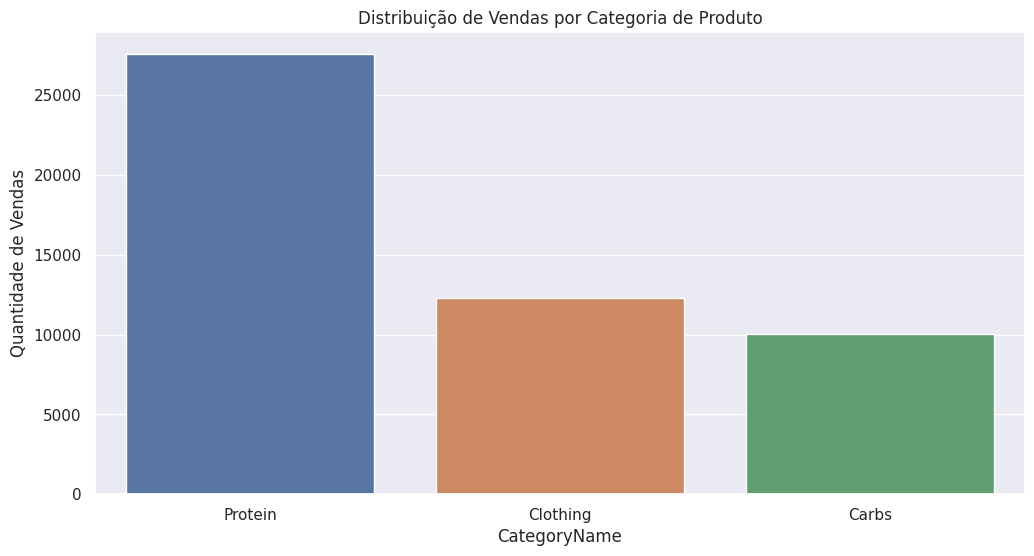

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.countplot(data=dados_completos_metas, x='CategoryName', order=dados_completos_metas['CategoryName'].value_counts().index)
plt.title('Distribuição de Vendas por Categoria de Produto')
plt.ylabel('Quantidade de Vendas')
plt.show()


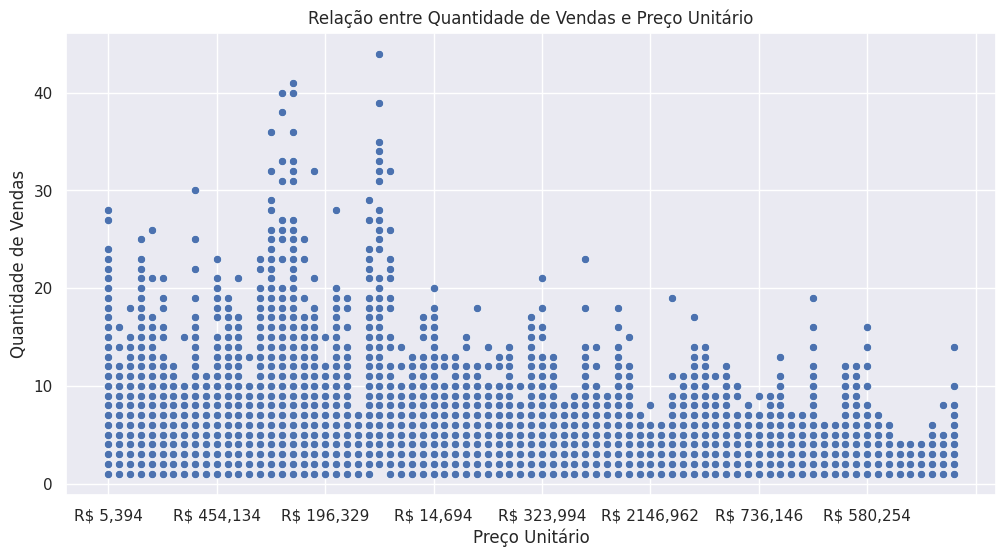

In [ ]:
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 6))
sns.scatterplot(data=dados_completos_metas, x='UnitPrice', y='OrderQuantity')

# Limitar o número de ticks no eixo x
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(10))

plt.title('Relação entre Quantidade de Vendas e Preço Unitário')
plt.xlabel('Preço Unitário')
plt.ylabel('Quantidade de Vendas')
plt.show()



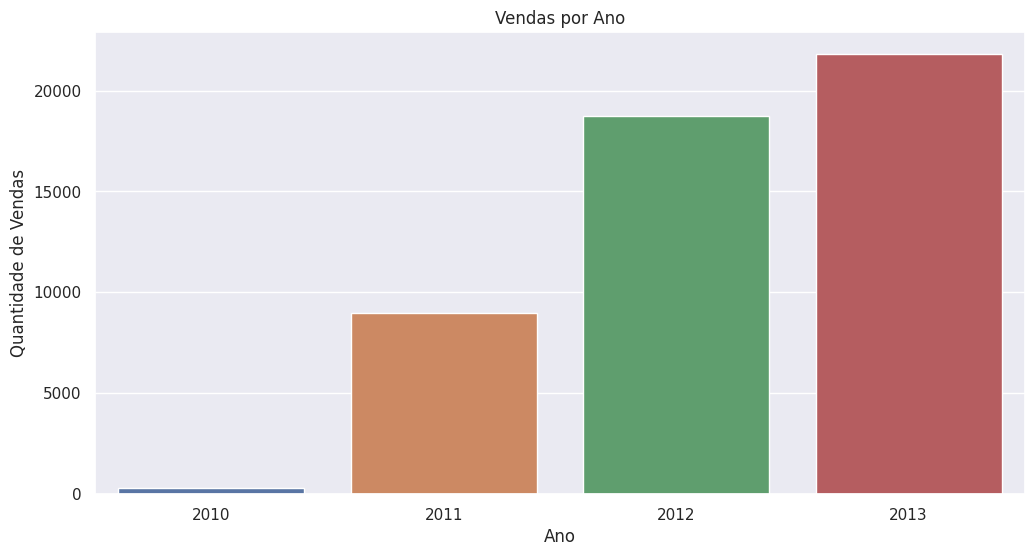

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dados_completos_metas, x='Ano')
plt.title('Vendas por Ano')
plt.ylabel('Quantidade de Vendas')
plt.show()


# As perguntas

## Qual é o perfil dos clientes em termos de tipo de negócio, cidade, país e continente?

In [ ]:
# Tipo de negócio
print(dados_completos_metas['BusinessType'].value_counts(normalize=True) * 100)

# Cidade
print(dados_completos_metas['CityName'].value_counts(normalize=True).head(10) * 100)

# País
print(dados_completos_metas['CountryName'].value_counts(normalize=True) * 100)

# Continente
print(dados_completos_metas['Continent'].value_counts(normalize=True) * 100)


Warehouse           45.128997
Supplement Store    41.688400
Gym                 13.182602
Name: BusinessType, dtype: float64
Toronto     5.685511
London      2.264976
Paris       1.693215
Montreal    1.620993
Burnaby     1.562813
Richmond    1.452474
Seattle     1.334109
Garland     1.193677
Houston     1.117442
Miami       1.067287
Name: CityName, dtype: float64
United States     64.590940
Canada            18.870120
United Kingdom     5.575172
France             5.549091
Germany            2.786583
Brazil             2.628095
Name: CountryName, dtype: float64
North America    83.461060
Europe           13.910845
South America     2.628095
Name: Continent, dtype: float64


print(dados_completos_metas['BusinessType'].value_counts(normalize=True) * 100)

Esta linha de código calcula a porcentagem de vendas para cada tipo de negócio. O resultado mostra que 45,13% das vendas foram feitas para o tipo de negócio "Warehouse", 41,69% para "Supplement Store" e 13,18% para "Gym".

print(dados_completos_metas['CityName'].value_counts(normalize=True).head(10) * 100)

Esta linha de código calcula a porcentagem de vendas nas cidades e exibe as 10 principais cidades em termos de vendas. Por exemplo, 5,69% das vendas foram feitas em Toronto, 2,26% em Londres e 1,69% em Paris.

print(dados_completos_metas['CountryName'].value_counts(normalize=True) * 100)

Esta linha de código calcula a porcentagem de vendas em cada país. O resultado mostra que 64,59% das vendas foram feitas nos Estados Unidos, 18,87% no Canadá e 5,58% no Reino Unido.

print(dados_completos_metas['Continent'].value_counts(normalize=True) * 100)

Esta linha de código calcula a porcentagem de vendas em cada continente. O resultado mostra que 83,46% das vendas foram feitas na América do Norte, 13,91% na Europa e 2,63% na América do Sul.

Essas informações podem ajudar a entender melhor o perfil dos clientes em termos de tipo de negócio, cidade, país e continente.

## Produtos vendidos por categoria

In [ ]:
# Produtos mais vendidos
print(dados_completos_metas['ProductName'].value_counts().head(10))

# Categorias mais vendidas
print(dados_completos_metas['CategoryName'].value_counts())


Pure Casein Protein         4980
Hydrolyzed Whey Protein     4941
Isolate Whey Protein        4553
Concentrate Whey Protein    4263
100% Egg Protein            3759
PRO Weight Gainer           3622
Serious MASS Gainer         3593
Long-Sleeve Logo Jersey     2622
Blended Protein             2304
STEAK in Powder             1556
Name: ProductName, dtype: int64
Protein     27566
Clothing    12267
Carbs       10013
Name: CategoryName, dtype: int64


print(dados_completos_metas['ProductName'].value_counts().head(10))

Esta linha de código conta a quantidade de vendas de cada produto e exibe os 10 produtos mais vendidos. Os números ao lado de cada produto representam a quantidade de vendas do produto. Por exemplo, o produto "Pure Casein Protein" foi vendido 4980 vezes, "Hydrolyzed Whey Protein" foi vendido 4941 vezes e "Isolate Whey Protein" foi vendido 4553 vezes.

print(dados_completos_metas['CategoryName'].value_counts())

Esta linha de código conta a quantidade de vendas em cada categoria de produto. Os números ao lado de cada categoria representam a quantidade total de vendas na categoria. Por exemplo, a categoria "Protein" teve 27566 vendas, a categoria "Clothing" teve 12267 vendas e a categoria "Carbs" teve 10013 vendas.

Essas informações podem ajudar a entender quais produtos e categorias são mais populares e têm maior demanda entre os clientes.

## Evolução das vendas ao longo do tempo (mensal, trimestral, anual)

In [ ]:
# Vendas mensais
dados_completos_metas.set_index('OrderDate', inplace=True)
vendas_mensais = dados_completos_metas.resample('M')['OrderQuantity'].sum()
print(vendas_mensais)

# Vendas trimestrais
vendas_trimestrais = dados_completos_metas.resample('Q')['OrderQuantity'].sum()
print(vendas_trimestrais)

# Vendas anuais
vendas_anuais = dados_completos_metas.resample('Y')['OrderQuantity'].sum()
print(vendas_anuais)


OrderDate
2010-12-31      736
2011-01-31     1875
2011-02-28        0
2011-03-31     2497
2011-04-30        0
2011-05-31     4724
2011-06-30        0
2011-07-31      823
2011-08-31     3558
2011-09-30     1172
2011-10-31     2688
2011-11-30     1992
2011-12-31     6382
2012-01-31     9195
2012-02-29     7335
2012-03-31     4561
2012-04-30     6936
2012-05-31     5458
2012-06-30     2899
2012-07-31     4647
2012-08-31     3346
2012-09-30     4593
2012-10-31     6880
2012-11-30     5184
2012-12-31     7250
2013-01-31    11137
2013-02-28    10707
2013-03-31     5561
2013-04-30     7969
2013-05-31     7775
2013-06-30     3692
2013-07-31     5231
2013-08-31     5391
2013-09-30     5308
2013-10-31     7519
2013-11-30     7560
Freq: M, Name: OrderQuantity, dtype: int64
OrderDate
2010-12-31      736
2011-03-31     4372
2011-06-30     4724
2011-09-30     5553
2011-12-31    11062
2012-03-31    21091
2012-06-30    15293
2012-09-30    12586
2012-12-31    19314
2013-03-31    27405
2013-06-30    194

## Como as metas de vendas se comparam às vendas reais por país e ano?

In [ ]:
# Comparação de metas de vendas com vendas reais por país e ano
vendas_reais = dados_completos_metas.groupby(['CountryName', 'Ano'])['OrderQuantity'].sum().reset_index()
vendas_metas = pd.merge(vendas_reais, fMetas, on=['CountryName', 'Ano'])
vendas_metas['Diferença'] = vendas_metas['OrderQuantity'] - vendas_metas['Meta']
print(vendas_metas)

       CountryName   Ano  OrderQuantity      Meta  Diferença
0           Brazil  2012            102    250000    -249898
1           Brazil  2013           3485   1500000   -1496515
2           Canada  2011           5744   3500000   -3494256
3           Canada  2012          14112   5500000   -5485888
4           Canada  2013          13382   6000000   -5986618
5           France  2011            351    250000    -249649
6           France  2012           3673   1500000   -1496327
7           France  2013           6996   2500000   -2493004
8          Germany  2012            558    250000    -249442
9          Germany  2013           4808   1500000   -1495192
10  United Kingdom  2011            251    250000    -249749
11  United Kingdom  2012           3664   1500000   -1496336
12  United Kingdom  2013           6307   2500000   -2493693
13   United States  2011          19365  15000000  -14980635
14   United States  2012          46175  20000000  -19953825
15   United States  2013

vendas_reais = dados_completos_metas.groupby(['CountryName', 'Ano'])['OrderQuantity'].sum().reset_index()

Esta linha de código agrupa os dados por 'CountryName' e 'Ano', e calcula a soma das quantidades de vendas ('OrderQuantity') para cada grupo. Em seguida, ele redefine o índice para tornar o resultado um DataFrame.

vendas_metas = pd.merge(vendas_reais, fMetas, on=['CountryName', 'Ano'])

Esta linha de código combina o DataFrame 'vendas_reais' com o DataFrame 'fMetas' usando as colunas 'CountryName' e 'Ano' como chaves de junção.

vendas_metas['Diferença'] = vendas_metas['OrderQuantity'] - vendas_metas['Meta']

Esta linha de código calcula a diferença entre as vendas reais ('OrderQuantity') e as metas de vendas ('Meta') e armazena o resultado na coluna 'Diferença'.

print(vendas_metas)

Esta linha de código exibe o DataFrame 'vendas_metas', que contém informações sobre as vendas reais, as metas de vendas e a diferença entre elas para cada país e ano. Por exemplo, no Brasil, em 2012, as vendas reais foram de 102 unidades, enquanto a meta era de 250.000 unidades, resultando em uma diferença de -249.898 unidades.

Essas informações podem ajudar a entender como as vendas reais se comparam às metas de vendas estabelecidas e identificar áreas onde pode ser necessário fazer ajustes ou melhorias.

In [ ]:
# Vendas por categoria de produto e continente
vendas_por_categoria_continente = dados_completos_metas.groupby(['CategoryName', 'Continent'])['OrderQuantity'].sum().unstack()
print(vendas_por_categoria_continente)

# Vendas por tipo de negócio e país
vendas_por_tipo_negocio_pais = dados_completos_metas.groupby(['BusinessType', 'CountryName'])['OrderQuantity'].sum().unstack()
print(vendas_por_tipo_negocio_pais)


Continent     Europe  North America  South America
CategoryName                                      
Carbs           4172          22110            482
Clothing       11284          51703           1510
Protein        11152          68573           1595
CountryName       Brazil  Canada  France  Germany  United Kingdom  \
BusinessType                                                        
Gym                  750    3550    1181      450             901   
Supplement Store    2108    9778    1856     1377            3799   
Warehouse            729   20121    7983     3539            5522   

CountryName       United States  
BusinessType                     
Gym                       11374  
Supplement Store          47862  
Warehouse                 49701  


# Teste Machine Learning

Vamos começar selecionando as características que queremos usar na segmentação. Para este exemplo, vamos considerar as seguintes características: quantidade de vendas (OrderQuantity), tipo de produto comprado (CategoryName), e país (CountryName).

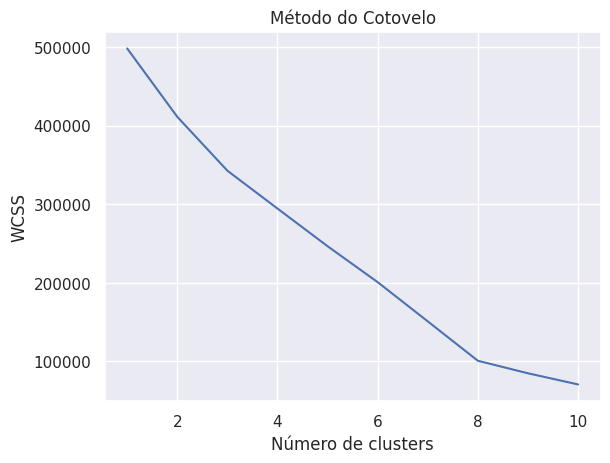

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionando características para segmentação
segmentation_data = dados_completos_metas[['OrderQuantity', 'CategoryName', 'CountryName']]

# Tratando valores ausentes (caso haja)
segmentation_data = segmentation_data.dropna()

# Codificando variáveis categóricas
segmentation_data = pd.get_dummies(segmentation_data, columns=['CategoryName', 'CountryName'])

# Padronizando os dados
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(segmentation_data)

# Método do cotovelo para determinar o número ideal de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(segmentation_data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()


O método do cotovelo (Elbow Method) é uma técnica utilizada para determinar o número ideal de clusters (grupos) em algoritmos de agrupamento, como o K-means. Ele visa encontrar um equilíbrio entre o número de clusters e a variabilidade dos dados dentro de cada cluster.

O método envolve a execução do algoritmo de agrupamento várias vezes, variando o número de clusters de 1 até um valor máximo definido. Para cada iteração, é calculada a soma das distâncias quadráticas entre os pontos de dados e seus respectivos centróides (chamada de soma dos quadrados intra-cluster ou WCSS - Within Cluster Sum of Squares). À medida que o número de clusters aumenta, o valor de WCSS diminui, já que os pontos de dados estão mais próximos de seus respectivos centróides.

O objetivo do método do cotovelo é identificar o ponto em que o declínio no valor de WCSS começa a diminuir, indicando que adicionar mais clusters não resulta em uma melhora significativa na variabilidade dos dados dentro dos clusters. Esse ponto, que se assemelha à curvatura de um cotovelo em um gráfico, representa o número ideal de clusters.

Com base no gráfico do método do cotovelo, escolhi o número de clusters que parece ser o "ponto de cotovelo" - onde a taxa de diminuição do WCSS começa a diminuir.

In [35]:
# Aplicando o algoritmo K-means com o número ideal de clusters escolhido
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(segmentation_data_scaled)

# Adicionando os clusters aos dados originais
dados_completos_metas['Cluster'] = clusters

# Analisando e interpretando os resultados
cluster_summary = dados_completos_metas.groupby('Cluster').agg({'OrderQuantity': 'mean', 'CategoryName': lambda x: x.value_counts().index[0], 'CountryName': lambda x: x.value_counts().index[0]})
print(cluster_summary)


         OrderQuantity CategoryName    CountryName
Cluster                                           
0             5.264445     Clothing  United States
1             2.946702      Protein  United States
2             2.672925        Carbs  United States


O resultado apresentado mostra informações sobre os 3 clusters (0, 1 e 2) identificados pelo algoritmo K-means.

Os valores na tabela são médias de OrderQuantity e os modos (valores mais frequentes) de CategoryName e CountryName para cada cluster. Vamos analisar cada cluster em detalhes:

**Cluster 0:**

* Média de quantidade de vendas (OrderQuantity): 5.26
* Categoria de produto mais comum (CategoryName): Clothing
* País mais comum (CountryName): United States


**Cluster 1:**

* Média de quantidade de vendas (OrderQuantity): 2.95
* Categoria de produto mais comum (CategoryName): Protein
* País mais comum (CountryName): United States

**Cluster 2:**

* Média de quantidade de vendas (OrderQuantity): 2.67
* Categoria de produto mais comum (CategoryName): Carbs
* País mais comum (CountryName): United States
* Com base nesses resultados, podemos inferir o seguinte sobre cada cluster:

**Cluster 0:** Este grupo de clientes tem uma maior quantidade média de vendas (5.26) e tendem a comprar mais produtos da categoria "Clothing". A maioria desses clientes está localizada nos Estados Unidos.

**Cluster 1**: Este grupo de clientes tem uma quantidade média de vendas moderada (2.95) e tendem a comprar mais produtos da categoria "Protein". A maioria desses clientes também está localizada nos Estados Unidos.

**Cluster 2:** Este grupo de clientes tem a menor quantidade média de vendas (2.67) e tendem a comprar mais produtos da categoria "Carbs". A maioria desses clientes está localizada nos Estados Unidos.

Com base nessa segmentação, é possível desenvolver estratégias de marketing específicas para cada grupo, considerando suas preferências e comportamento de compra. Por exemplo, você pode direcionar promoções de produtos de vestuário para clientes no Cluster 0, promoções de produtos ricos em proteínas para clientes no Cluster 1 e promoções de produtos ricos em carboidratos para clientes no Cluster 2. Além disso, como a maioria dos clientes está localizada nos Estados Unidos, você pode adaptar suas estratégias de marketing para esse mercado específico.